# Global Vaccination Effort 

**This notebook seeks to explore the latest update of the coronavirus vaccine using visualizations. **

![](https://i1.wp.com/sitn.hms.harvard.edu/wp-content/uploads/2018/09/07-blog-Vaccines.jpg?resize=1200%2C630)

*Last Notebook Update: 2/16/2021 12:50 PM ET. If data is not available for a specific field, it will appear as 0. *

**Feel free to provide me with feedbacks **

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import plotly.express as px
import geopandas as gpd
plt.style.use('seaborn-bright') 

In [2]:
data = pd.read_csv("/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv")
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...


In [3]:
data.isnull().sum()

country                                   0
iso_code                                256
date                                      0
total_vaccinations                     1124
people_vaccinated                      1481
people_fully_vaccinated                2114
daily_vaccinations_raw                 1473
daily_vaccinations                      125
total_vaccinations_per_hundred         1124
people_vaccinated_per_hundred          1481
people_fully_vaccinated_per_hundred    2114
daily_vaccinations_per_million          125
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [4]:
dates = data.date.unique();
dates.sort()
latest_date = dates[-1];

In [5]:
# latest_data = data[data.date==latest_date]

data.sort_values(by=['total_vaccinations'], ascending=False, inplace=True);

# drop all the null values in the data we are using 

# latest_data.dropna(subset=['total_vaccinations', 'vaccines', 'daily_vaccinations', 'people_vaccinated_per_hundred'], inplace=True)


countries = data.country.unique()

vaccine_countries = []
total_vaccination = [] 
vaccine_name = [] 
daily_vaccination = [] 
people_vaccinated_per_hundred = [] 
iso_codes = [] 
latest_data_update = [] 
people_fully_vaccinated = [] 
people_fully_vaccinated_per_hundred  = []


# getting the latest vaccine data possible for each country 

for i in countries: 
    for d in dates[::-1]:
        total = data[data.country==i]['total_vaccinations'][data.date==d].sum()
        name = data[data.country==i]['vaccines'][data.date==d].sum()
        daily = data[data.country==i]['daily_vaccinations'][data.date==d].sum()
        per_hundred = data[data.country==i]['people_vaccinated_per_hundred'][data.date==d].sum(); 
        iso = data[data.country==i]['iso_code'][data.date==d].sum();
        fully = data[data.country==i]['people_fully_vaccinated'][data.date==d].sum(); 
        fully_per_hundred = data[data.country==i]['people_fully_vaccinated_per_hundred'][data.date==d].sum(); 
        
        # if one of those features are null
        if(total == 0):
            pass
        else:
            vaccine_countries.append(i)
            total_vaccination.append(total)
            vaccine_name.append(name) 
            
            daily_vaccination.append(daily)
            people_vaccinated_per_hundred.append(per_hundred)
            
            people_fully_vaccinated.append(fully)
            people_fully_vaccinated_per_hundred.append(fully_per_hundred);
            
            iso_codes.append(iso)
            latest_data_update.append(d)
            break

In [6]:
print("Vaccine country length:", len(vaccine_countries))
print("Total vaccinaton length:", len(total_vaccination))
print("Vaccine name length:", len(vaccine_name))
print("Daily vaccinaton length:", len(daily_vaccination))
print("People vaccinated per hundred length:", len(people_vaccinated_per_hundred))
print("ISO codes length:", len(iso_codes))

Vaccine country length: 90
Total vaccinaton length: 90
Vaccine name length: 90
Daily vaccinaton length: 90
People vaccinated per hundred length: 90
ISO codes length: 90


# Data Table on the Global Vaccine Effort

In [7]:
latest_vaccine_data = pd.DataFrame({'Country Name': vaccine_countries, 'Total Vaccinations': [format(int(i), ',d') for i in total_vaccination],
                          'Daily Vaccination': [format(int(i), ',d') for i in daily_vaccination], 'People Vaccinated per Hundred' : people_vaccinated_per_hundred, 
                          'Total Fully Vaccinations' : [format(int(i), ',d') for i in  people_fully_vaccinated], 'People Fully Vaccinated per Hundred': people_fully_vaccinated_per_hundred,
                          'Vaccine Name' : vaccine_name, 'Latest Data Update' : latest_data_update})

latest_vaccine_data.style.background_gradient(cmap='Greens')

,Country Name,Total Vaccinations,Daily Vaccination,People Vaccinated per Hundred,Total Fully Vaccinations,People Fully Vaccinated per Hundred,Vaccine Name,Latest Data Update
0,United States,"52,884,356","1,667,631",11.450000,"14,077,440",4.210000,"Moderna, Pfizer/BioNTech",2021-02-14
1,China,"40,520,000","1,674,286",0.000000,0,0.000000,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",2021-02-09
2,United Kingdom,"15,839,781","433,313",22.540000,"539,630",0.790000,"Oxford/AstraZeneca, Pfizer/BioNTech",2021-02-14
3,England,"13,353,631","337,467",22.850000,"490,722",0.870000,"Oxford/AstraZeneca, Pfizer/BioNTech",2021-02-14
4,India,"8,720,822","351,688",0.000000,0,0.000000,"Covaxin, Oxford/AstraZeneca",2021-02-15
5,Israel,"6,599,799","120,676",46.080000,"2,611,036",30.170000,"Moderna, Pfizer/BioNTech",2021-02-15
6,Brazil,"5,293,979","241,206",2.390000,"217,869",0.100000,"Oxford/AstraZeneca, Sinovac",2021-02-15
7,United Arab Emirates,"5,086,835","96,169",0.000000,0,0.000000,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V",2021-02-15
8,Turkey,"4,182,027","216,832",4.280000,"573,879",0.680000,Sinovac,2021-02-15
9,Germany,"4,146,348","118,146",3.270000,"1,410,239",1.680000,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",2021-02-14


# Displaying the data using a bar chart
this shows the top 15 countries for each respective categories

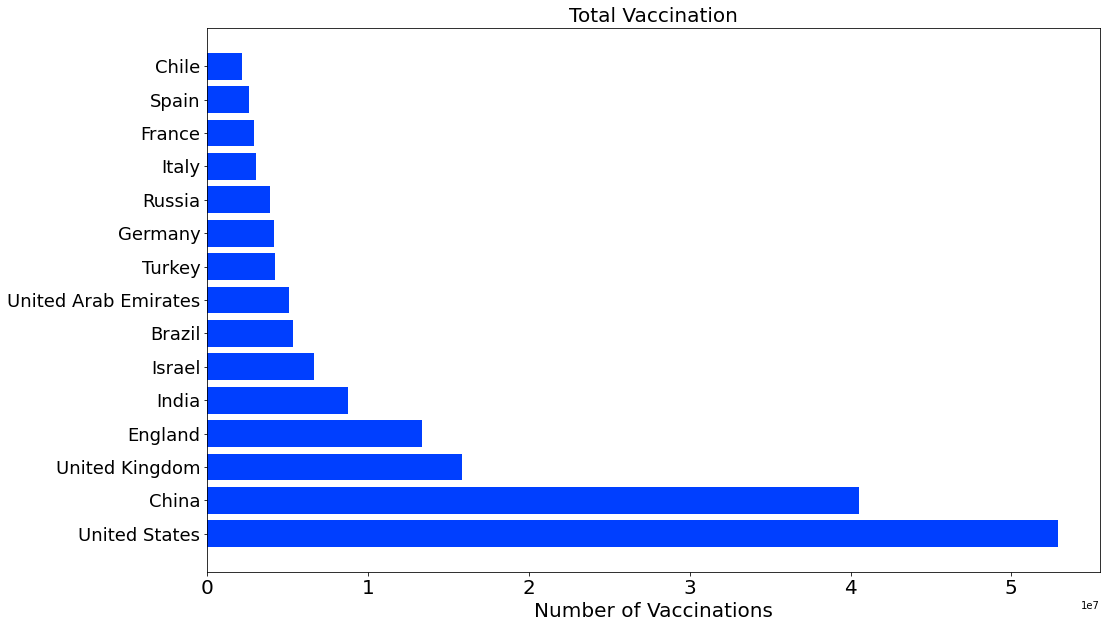

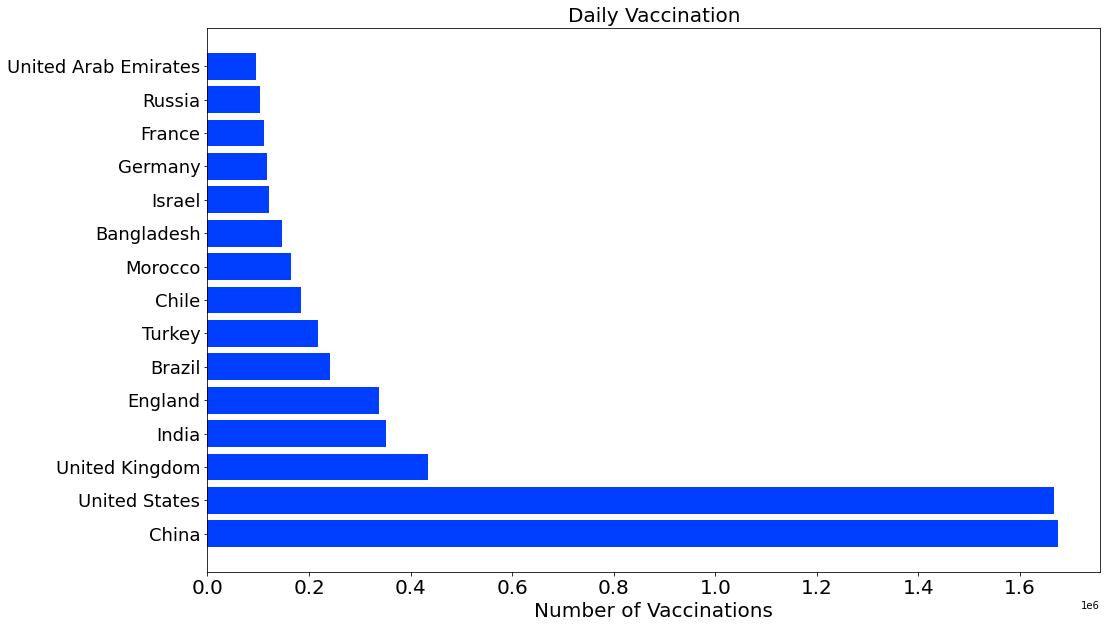

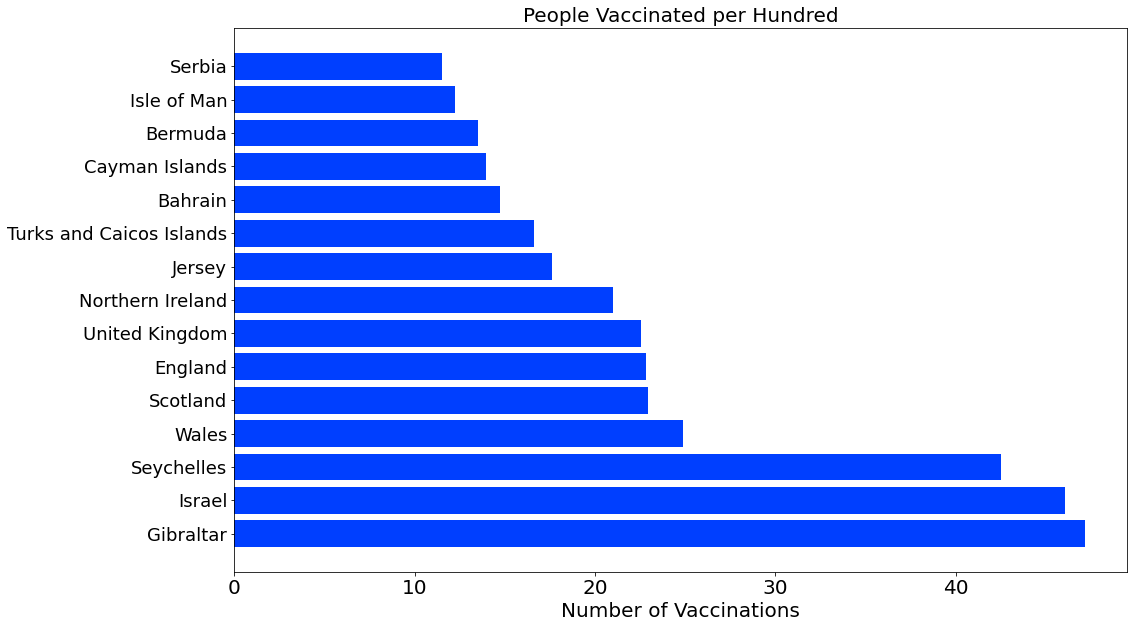

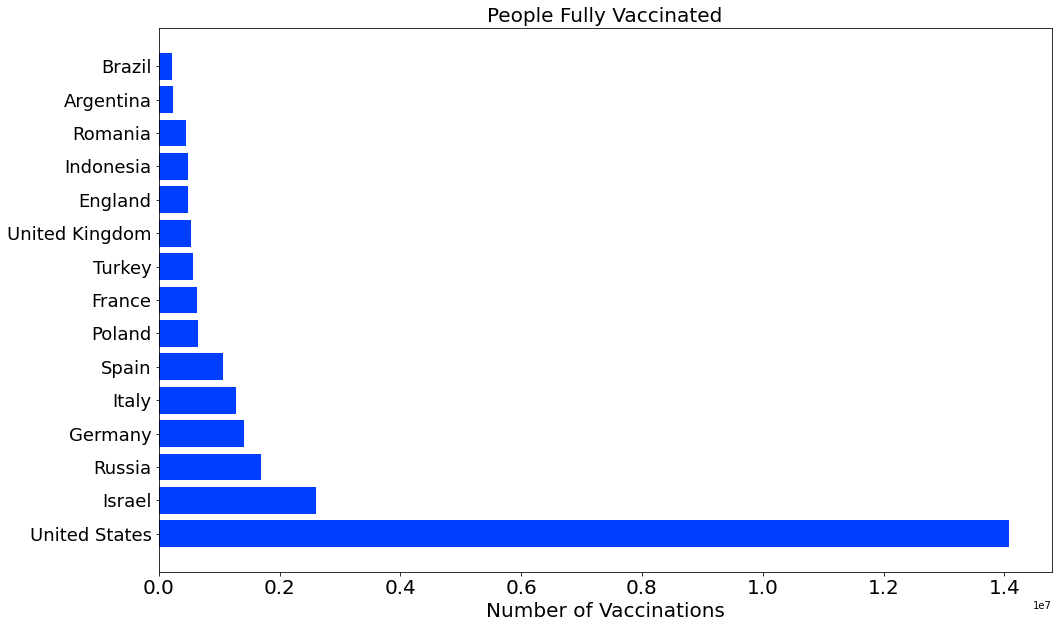

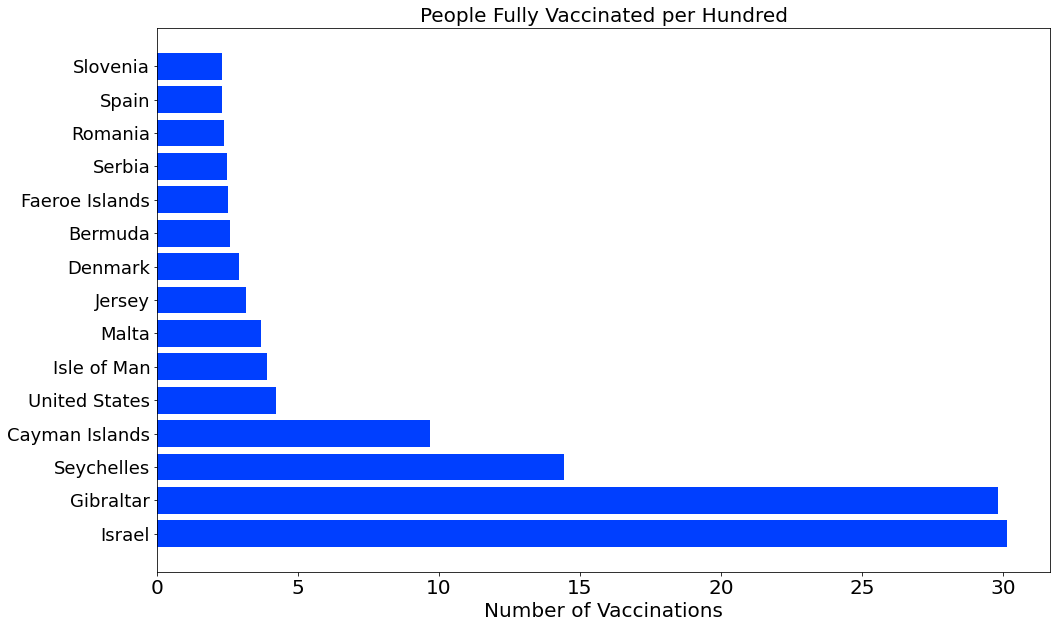

In [8]:
import operator
def plot_bar_graphs(x, y, title, x_title):
    plt.figure(figsize=(16,10))
    plt.barh(x, y)
    plt.title(title, size=20)
    plt.xticks(size=20)
    plt.yticks(size=18)
    plt.xlabel(x_title, size=20)
    plt.show()
    

# sort each feature in a descending manner       
vaccine_countries_total = [[k, v] for k, v in sorted(zip(vaccine_countries, total_vaccination), key=operator.itemgetter(1), reverse=True)]
vaccine_countries_daily = [[k, v] for k, v in sorted(zip(vaccine_countries, daily_vaccination), key=operator.itemgetter(1), reverse=True)]
vaccine_countries_per_hundred = [[k, v] for k, v in sorted(zip(vaccine_countries, people_vaccinated_per_hundred), key=operator.itemgetter(1), reverse=True)]
vaccine_countries_fully = [[k, v] for k, v in sorted(zip(vaccine_countries, people_fully_vaccinated), key=operator.itemgetter(1), reverse=True)]
vaccine_countries_fully_per_hundred = [[k, v] for k, v in sorted(zip(vaccine_countries, people_fully_vaccinated_per_hundred), key=operator.itemgetter(1), reverse=True)]
    
plot_bar_graphs([i[0] for i in vaccine_countries_total][:15], [i[1] for i in vaccine_countries_total][:15], 'Total Vaccination', 'Number of Vaccinations')
plot_bar_graphs([i[0] for i in vaccine_countries_daily][:15], [i[1] for i in vaccine_countries_daily][:15], 'Daily Vaccination', 'Number of Vaccinations')
plot_bar_graphs([i[0] for i in vaccine_countries_per_hundred][:15],[i[1] for i in vaccine_countries_per_hundred][:15], 'People Vaccinated per Hundred'.format(latest_date), 'Number of Vaccinations')
plot_bar_graphs([i[0] for i in vaccine_countries_fully][:15],[i[1] for i in  vaccine_countries_fully][:15], 'People Fully Vaccinated'.format(latest_date), 'Number of Vaccinations')
plot_bar_graphs([i[0] for i in vaccine_countries_fully_per_hundred][:15],[i[1] for i in vaccine_countries_fully_per_hundred][:15], 'People Fully Vaccinated per Hundred'.format(latest_date), 'Number of Vaccinations')

# Geolocation Vaccine Data

In [9]:
fig = px.scatter_geo(latest_vaccine_data, locations=iso_codes, color=total_vaccination,
                     hover_name="Country Name", size=[i for i in total_vaccination],
                     projection="natural earth", title="Total Vaccination")
fig.show()

In [10]:
fig = px.choropleth(latest_vaccine_data, locations=iso_codes, color='Vaccine Name',
                     hover_name="Country Name",
                     projection="natural earth", title="Total Vaccinaton by Vaccine Name")
fig.show()

In [11]:
fig = px.scatter_geo(latest_vaccine_data, locations=iso_codes, color=daily_vaccination,
                     hover_name="Country Name", size=[i for i in daily_vaccination],
                     projection="natural earth", title="Daily Vaccination")
fig.show()

In [12]:
fig = px.scatter_geo(latest_vaccine_data, locations=iso_codes, color='People Vaccinated per Hundred',
                     hover_name="Country Name", size="People Vaccinated per Hundred",
                     projection="natural earth", title="People Vaccinated per Hundred")
fig.show()

In [13]:
fig = px.scatter_geo(latest_vaccine_data, locations=iso_codes, color=[i for i in people_fully_vaccinated],
                     hover_name="Country Name", size=[i for i in people_fully_vaccinated],
                     projection="natural earth", title="Total Fully Vaccinations")
fig.show()

In [14]:
fig = px.scatter_geo(latest_vaccine_data, locations=iso_codes, color='People Fully Vaccinated per Hundred',
                     hover_name="Country Name", size="People Fully Vaccinated per Hundred",
                     projection="natural earth", title="People Fully Vaccinated per Hundred")
fig.show()

In [15]:
fig = px.choropleth(latest_vaccine_data, locations=iso_codes, color='Latest Data Update',
                     hover_name="Country Name", 
                     projection="natural earth", title="Latest Vaccine Data Update")
fig.show()